Nama : Fahmi Adhiwangsa

NIM  : 1103204142

# 01. PyTorch Workflow Fundamentals

Inti dari machine learning dan deep learning adalah mengambil beberapa data dari masa lalu, membangun algoritma (seperti jaringan saraf) untuk menemukan pola di dalamnya dan menggunakan pola yang ditemukan untuk memprediksi masa depan.

pertama impor apa yang kita perlukan untuk modul ini.
Disini kita akan menggunakan modul `torch`, `torch.nn` (`nn` adalah singkatan dari jaringan saraf dan paket ini berisi blok penyusun untuk membuat jaringan saraf di PyTorch) dan `matplotlib`.

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

In [40]:
weight = 0.6
bias = 0.6

# Create data
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.6000],
         [0.6060],
         [0.6120],
         [0.6180],
         [0.6240],
         [0.6300],
         [0.6360],
         [0.6420],
         [0.6480],
         [0.6540]]))

In [41]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [42]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

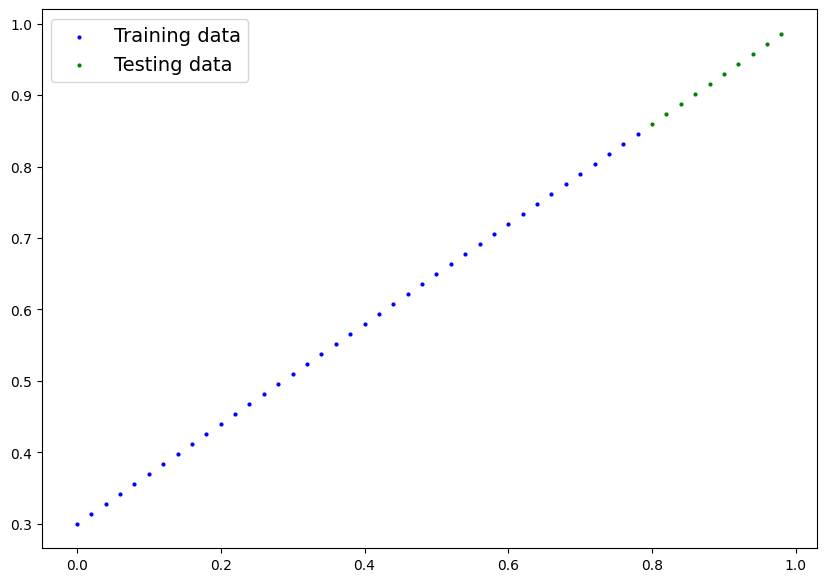

In [5]:
plot_predictions();

## 2. Build model

Sekarang kita mempunyai beberapa data, kita buatkan model untuk menggunakan titik biru untuk memprediksi titik hijau.

In [43]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                   requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# Checking the contents of a PyTorch model

In [44]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [45]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`
Untuk memeriksanya, kita dapat meneruskan data pengujian `X_test` ke dalamnya untuk melihat seberapa dekat data tersebut memprediksi `y_test`.

In [47]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [48]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 20
Number of predictions made: 20
Predicted values:
tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285],
        [0.4318],
        [0.4352],
        [0.4386],
        [0.4419],
        [0.4453],
        [0.4487],
        [0.4520],
        [0.4554],
        [0.4588],
        [0.4621]])


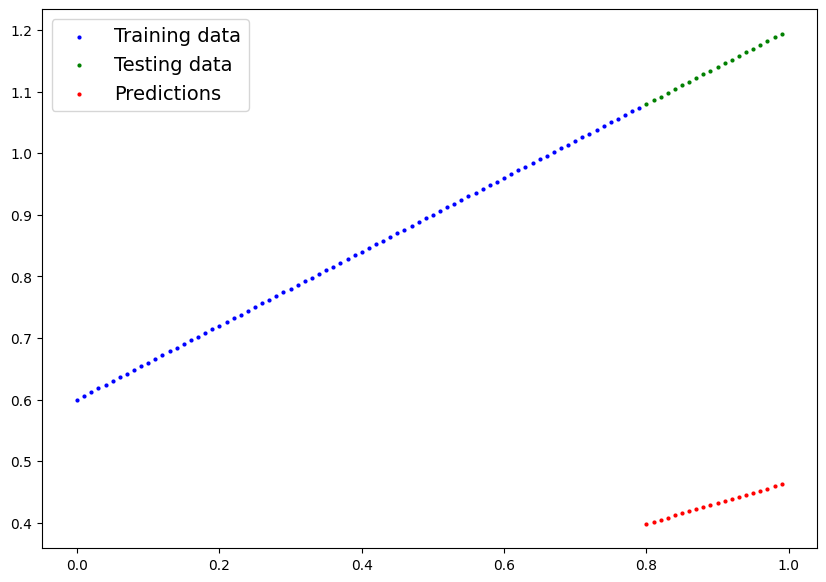

In [49]:
plot_predictions(predictions=y_preds)

In [50]:
y_test - y_preds

tensor([[0.6818],
        [0.6845],
        [0.6871],
        [0.6897],
        [0.6924],
        [0.6950],
        [0.6976],
        [0.7003],
        [0.7029],
        [0.7055],
        [0.7082],
        [0.7108],
        [0.7134],
        [0.7161],
        [0.7187],
        [0.7213],
        [0.7240],
        [0.7266],
        [0.7292],
        [0.7319]])

## 3. Train model

Saat ini model kita sedang membuat prediksi menggunakan parameter acak untuk melakukan penghitungan, pada dasarnya hanya menebak (secara acak).

Untuk memperbaikinya, kita dapat memperbarui parameter internalnya (saya juga menyebut *parameter* sebagai pola), nilai `weights` dan `bias` yang kita tetapkan secara acak menggunakan `nn.Parameter()` dan `torch.randn()` menjadi sesuatu yang lebih mewakili data.



### Creating a loss function and optimizer in PyTorch

In [51]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


### PyTorch testing loop



In [53]:
torch.manual_seed(42)
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()

    with torch.inference_mode():
      test_pred = model_0(X_test)
      test_loss = loss_fn(test_pred, y_test.type(torch.float))
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.00752317626029253 | MAE Test Loss: 0.0024269581772387028 
Epoch: 10 | MAE Train Loss: 0.00752317626029253 | MAE Test Loss: 0.0024269581772387028 
Epoch: 20 | MAE Train Loss: 0.00752317626029253 | MAE Test Loss: 0.0024269581772387028 
Epoch: 30 | MAE Train Loss: 0.00752317626029253 | MAE Test Loss: 0.0024269581772387028 
Epoch: 40 | MAE Train Loss: 0.00752317626029253 | MAE Test Loss: 0.0024269581772387028 
Epoch: 50 | MAE Train Loss: 0.00752317626029253 | MAE Test Loss: 0.0024269581772387028 
Epoch: 60 | MAE Train Loss: 0.00752317626029253 | MAE Test Loss: 0.0024269581772387028 
Epoch: 70 | MAE Train Loss: 0.00752317626029253 | MAE Test Loss: 0.0024269581772387028 
Epoch: 80 | MAE Train Loss: 0.00752317626029253 | MAE Test Loss: 0.0024269581772387028 
Epoch: 90 | MAE Train Loss: 0.00752317626029253 | MAE Test Loss: 0.0024269581772387028 


Oh would you look at that! Looks like our loss is going down with every epoch, let's plot it to find out.

In [55]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5928])), ('bias', tensor([0.5953]))])

And the original values for weights and bias are:
weights: 0.6, bias: 0.6


## 4. Making predictions with a trained PyTorch model (inference)

In [57]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.0696],
        [1.0755],
        [1.0814],
        [1.0874],
        [1.0933],
        [1.0992],
        [1.1051],
        [1.1111],
        [1.1170],
        [1.1229],
        [1.1289],
        [1.1348],
        [1.1407],
        [1.1466],
        [1.1526],
        [1.1585],
        [1.1644],
        [1.1704],
        [1.1763],
        [1.1822]])

Nice! We've made some predictions with our trained model, now how do they look?

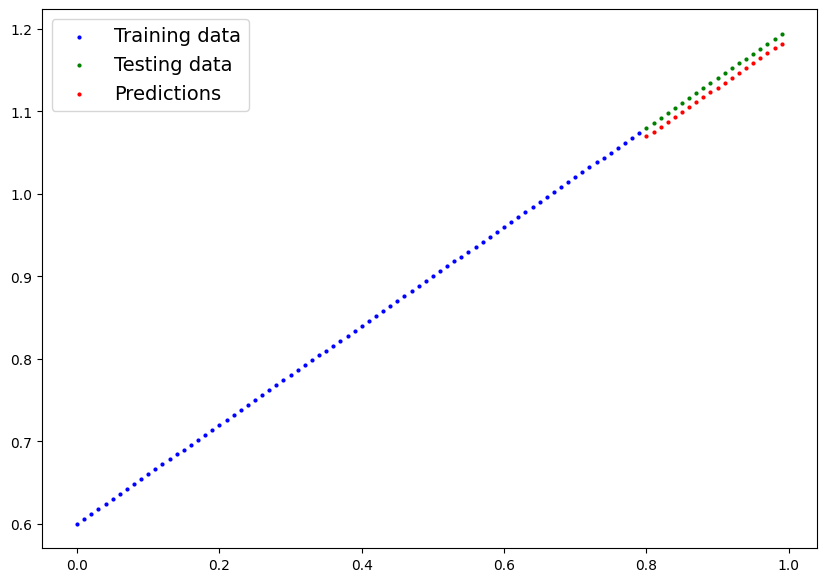

In [58]:
plot_predictions(predictions=y_preds)

In [61]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [60]:
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Jan  4 07:20 models/01_pytorch_workflow_model_0.pth


In [63]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [64]:
# Put the loaded model into evaluation mode
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [65]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together


In [66]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [67]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [68]:
weight = 0.6
bias = 0.6

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.6000],
         [0.6060],
         [0.6120],
         [0.6180],
         [0.6240],
         [0.6300],
         [0.6360],
         [0.6420],
         [0.6480],
         [0.6540]]))

In [27]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Excellent, let's visualize them to make sure they look okay.

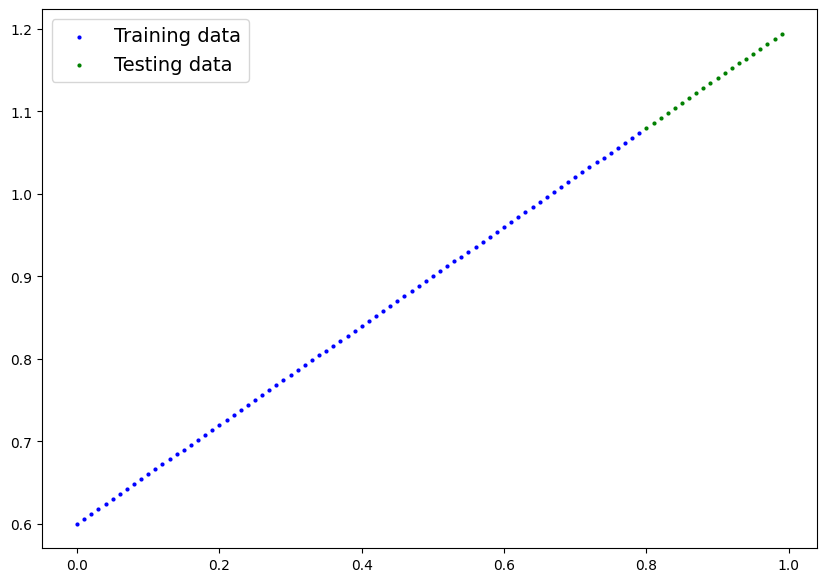

In [69]:
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model



In [70]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [71]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [73]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

In [74]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [75]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.2950006127357483 | Test loss: 0.36373457312583923
Epoch: 100 | Train loss: 0.009015887044370174 | Test loss: 0.0007123053073883057
Epoch: 200 | Train loss: 0.009015887044370174 | Test loss: 0.0007123053073883057
Epoch: 300 | Train loss: 0.009015887044370174 | Test loss: 0.0007123053073883057
Epoch: 400 | Train loss: 0.009015887044370174 | Test loss: 0.0007123053073883057
Epoch: 500 | Train loss: 0.009015887044370174 | Test loss: 0.0007123053073883057
Epoch: 600 | Train loss: 0.009015887044370174 | Test loss: 0.0007123053073883057
Epoch: 700 | Train loss: 0.009015887044370174 | Test loss: 0.0007123053073883057
Epoch: 800 | Train loss: 0.009015887044370174 | Test loss: 0.0007123053073883057
Epoch: 900 | Train loss: 0.009015887044370174 | Test loss: 0.0007123053073883057


In [77]:
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6076]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6060], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.6, bias: 0.6


### 6.4 Making predictions

Sekarang kita memiliki model terlatih, mari evaluasinya dan buat beberapa prediksi.

In [78]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.0921],
        [1.0982],
        [1.1043],
        [1.1103],
        [1.1164],
        [1.1225],
        [1.1286],
        [1.1346],
        [1.1407],
        [1.1468],
        [1.1529],
        [1.1589],
        [1.1650],
        [1.1711],
        [1.1772],
        [1.1832],
        [1.1893],
        [1.1954],
        [1.2015],
        [1.2075]], device='cuda:0')

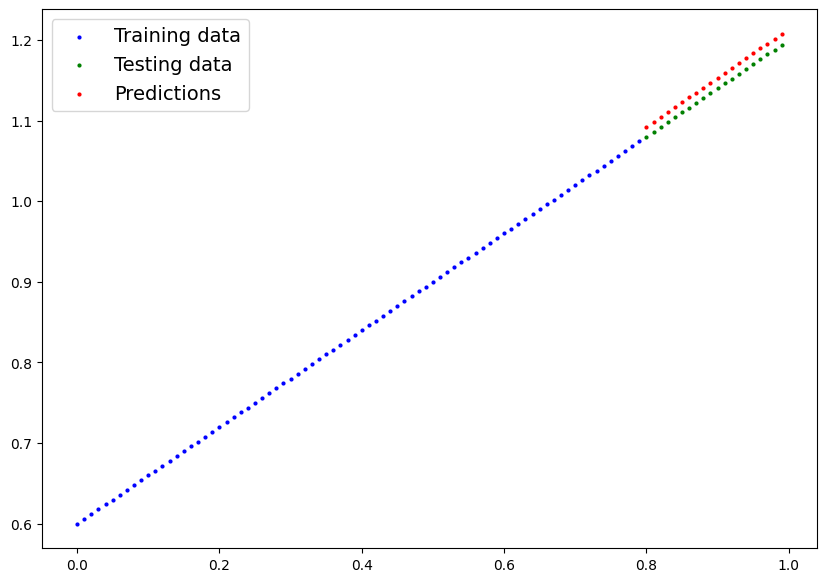

In [79]:
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a model



In [80]:
from pathlib import WindowsPath
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [81]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


Sekarang kita dapat mengevaluasi model yang dimuat untuk melihat apakah prediksinya sejalan dengan prediksi yang dibuat sebelum disimpan.

In [82]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')